In [90]:
import numpy as np
import matplotlib.pyplot as plt



In [30]:
testLabel=np.load('INSA_data_images/test_labels_0_10_25.npy')
testRGB = np.load('INSA_data_images/test_RGB_0_10_25.npy')
trainLabel= np.load('INSA_data_images/train_labels_0_10_25.npy')
trainRGB = np.load('INSA_data_images/train_RGB_0_10_25.npy')

In [31]:
print(testLabel.shape)
# 42805 images avec 5 labels possibles
print(testRGB.shape)
# 42805 images de 32*32
print(trainLabel.shape)
print(trainRGB.shape)


testRGB[2,]
#TODO : imprimer les images

(42805, 5)
(42805, 32, 32, 3)
(171222, 5)
(171222, 32, 32, 3)


array([[[0.01215425, 0.01595246, 0.00862416],
        [0.01228831, 0.01608651, 0.00813262],
        [0.01233299, 0.01885696, 0.0105456 ],
        ...,
        [0.00187676, 0.01438849, 0.00455784],
        [0.00223424, 0.01532687, 0.00420037],
        [0.00259172, 0.01389696, 0.004111  ]],

       [[0.01251173, 0.0184548 , 0.0088029 ],
        [0.01219894, 0.01894633, 0.01103713],
        [0.01362885, 0.01970597, 0.01121587],
        ...,
        [0.00125117, 0.01139461, 0.00290451],
        [0.00174271, 0.01103713, 0.00151928],
        [0.00227892, 0.01349479, 0.00134054]],

       [[0.0120202 , 0.01872291, 0.00898163],
        [0.01264578, 0.01756111, 0.00916037],
        [0.01438849, 0.01939318, 0.01009875],
        ...,
        [0.0014746 , 0.01130524, 0.00245766],
        [0.00156397, 0.01246704, 0.00384289],
        [0.00232361, 0.01425443, 0.00357478]],

       ...,

       [[0.05960946, 0.04915322, 0.03449663],
        [0.05661558, 0.04754457, 0.034586  ],
        [0.06439072, 0

In [103]:
testRGB[2,31,31]*[255, 255,255 ]*100

array([186.87162072, 450.08713526, 194.84784843])

In [112]:
 
def myImage(line, data):
    image= np.zeros([32,32,3])
    for i in range(0,31):
        for j in range(0,31):
            image[i,j] = data[line,i,j]*10
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

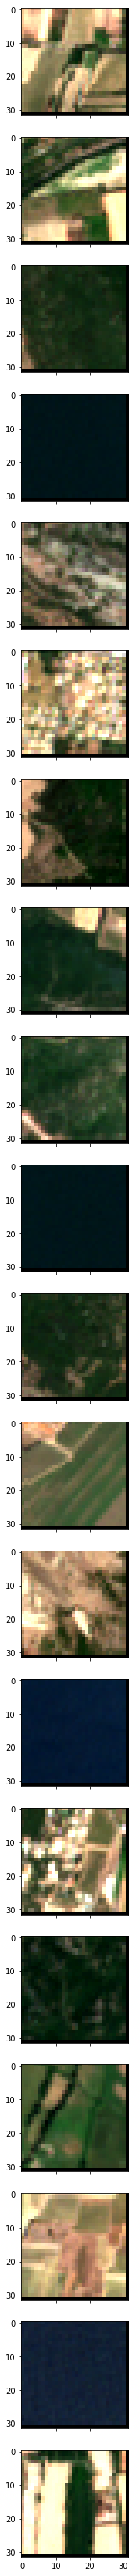

In [113]:
fig, axarr = plt.subplots(20, sharex=True,  figsize=(60,60))

for i in range(0,20):
    im=myImage(i,testRGB)
    axarr[i].imshow(im)

plt.show()
#plt.imshow(im)

# TODO : comprendre le label (débug visuel)

array([[[ 3.0993342 ,  4.06787613,  2.19915993],
        [ 3.13351803,  4.10205997,  2.07381921],
        [ 3.14491264,  4.80852585,  2.6891282 ],
        ...,
        [ 0.47857366,  3.66906475,  1.16225032],
        [ 0.56973055,  3.90835158,  1.07109344],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 3.19049109,  4.70597435,  2.24473837],
        [ 3.11072881,  4.83131507,  2.81446892],
        [ 3.47535636,  5.02502346,  2.86004737],
        ...,
        [ 0.31904911,  2.90562581,  0.74064972],
        [ 0.44438983,  2.81446892,  0.38741677],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 3.06515036,  4.77434202,  2.29031681],
        [ 3.22467492,  4.47808213,  2.33589526],
        [ 3.66906475,  4.94526118,  2.57518209],
        ...,
        [ 0.37602216,  2.88283659,  0.62670361],
        [ 0.39881139,  3.17909647,  0.97993655],
        [ 0.        ,  0.        ,  0.        ]],

       ...,

       [[15.2004111 , 12.53407212,  8.79663971],
        [14

In [84]:
im